In [72]:
import numpy as np
import pandas as pd

pd.set_option('display.float_format', '{:.10f}'.format)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [73]:
df = pd.read_csv('Kepler.csv')

In [74]:
data_clean = df.copy()

In [75]:
cols_to_drop = ['kepid', 'kepoi_name', 'kepler_name', 'koi_vet_stat', 'koi_vet_date', 'koi_disp_prov', 'koi_comment',
                'koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_time0_err1',
                'koi_time0_err2', 'koi_eccen', 'koi_eccen_err1', 'koi_eccen_err2', 'koi_longp', 'koi_longp_err1',
                'koi_longp_err2', 'koi_ingress', 'koi_ingress_err1', 'koi_ingress_err2', 'koi_incl_err1',
                'koi_incl_err2', 'koi_teq_err1', 'koi_teq_err2', 'koi_limbdark_mod', 'koi_parm_prov',
                'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_quarters', 'koi_trans_mod', 'koi_model_dof',
                'koi_model_chisq', 'koi_smet', 'koi_sage', 'koi_sparprov', 'koi_kepmag', 'koi_gmag', 'koi_rmag',
                'koi_imag', 'koi_zmag', 'koi_jmag', 'koi_hmag', 'koi_kmag']


In [76]:
brightness_magnitudes = ['koi_kepmag', 'koi_gmag', 'koi_rmag', 'koi_imag', 'koi_zmag', 'koi_jmag', 'koi_hmag',
                         'koi_kmag']

<Axes: xlabel='koi_kepmag', ylabel='koi_imag'>

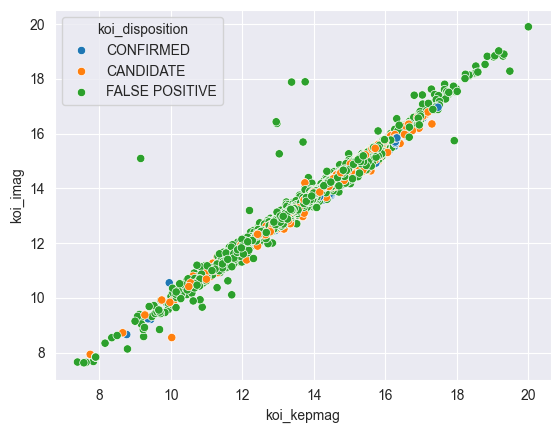

In [77]:
sns.scatterplot(data=df, x='koi_kepmag', y='koi_imag', hue='koi_disposition')

In [78]:
data_clean.drop(columns=cols_to_drop, axis=1, inplace=True)

In [79]:
data_clean.to_csv('Columns Cleaned.csv', index=False)

In [80]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 96 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rowid               9564 non-null   int64  
 1   koi_disposition     9564 non-null   object 
 2   koi_pdisposition    9564 non-null   object 
 3   koi_score           8054 non-null   float64
 4   koi_fpflag_nt       9564 non-null   int64  
 5   koi_fpflag_ss       9564 non-null   int64  
 6   koi_fpflag_co       9564 non-null   int64  
 7   koi_fpflag_ec       9564 non-null   int64  
 8   koi_period          9564 non-null   float64
 9   koi_time0bk         9564 non-null   float64
 10  koi_time0           9564 non-null   float64
 11  koi_impact          9201 non-null   float64
 12  koi_impact_err1     9110 non-null   float64
 13  koi_impact_err2     9110 non-null   float64
 14  koi_duration        9564 non-null   float64
 15  koi_duration_err1   9110 non-null   float64
 16  koi_du

In [81]:
for col in data_clean.columns:
    if data_clean[col].dtype != 'object':
        curr_mean = np.mean(data_clean[col])
        data_clean[col] = data_clean[col].fillna(curr_mean)

In [82]:
data_clean.isnull().sum()

rowid                 0
koi_disposition       0
koi_pdisposition      0
koi_score             0
koi_fpflag_nt         0
                     ..
koi_dikco_mra_err     0
koi_dikco_mdec        0
koi_dikco_mdec_err    0
koi_dikco_msky        0
koi_dikco_msky_err    0
Length: 96, dtype: int64

In [83]:
data_clean.drop('koi_datalink_dvr', axis=1, inplace=True)
data_clean.drop('koi_datalink_dvs', axis=1, inplace=True)

In [84]:
data_clean.isnull().sum()

rowid                 0
koi_disposition       0
koi_pdisposition      0
koi_score             0
koi_fpflag_nt         0
                     ..
koi_dikco_mra_err     0
koi_dikco_mdec        0
koi_dikco_mdec_err    0
koi_dikco_msky        0
koi_dikco_msky_err    0
Length: 94, dtype: int64

In [85]:
data_clean.drop('koi_sage_err1', axis=1, inplace=True)
data_clean.drop('koi_sage_err2', axis=1, inplace=True)
data_clean.drop('koi_sma_err1', axis=1, inplace=True)
data_clean.drop('koi_sma_err2', axis=1, inplace=True)

In [86]:
data_clean.isnull().sum()

rowid                 0
koi_disposition       0
koi_pdisposition      0
koi_score             0
koi_fpflag_nt         0
                     ..
koi_dikco_mra_err     0
koi_dikco_mdec        0
koi_dikco_mdec_err    0
koi_dikco_msky        0
koi_dikco_msky_err    0
Length: 90, dtype: int64

In [94]:
data_clean.drop('koi_pdisposition', axis=1, inplace=True)

In [95]:
data_clean.isnull().sum()

rowid                 0
koi_disposition       0
koi_score             0
koi_fpflag_nt         0
koi_fpflag_ss         0
                     ..
koi_dikco_mra_err     0
koi_dikco_mdec        0
koi_dikco_mdec_err    0
koi_dikco_msky        0
koi_dikco_msky_err    0
Length: 89, dtype: int64

In [96]:
data_clean.to_csv('NaNs Filled.csv', index=False)

In [99]:
# Categorical Values
for col in data_clean.columns:
    if data_clean[col].dtype == 'object':
        print(col)

koi_disposition
koi_fittype


In [101]:
data_clean['koi_fittype'].value_counts()

koi_fittype
LS+MCMC    7897
MCMC       1206
none        369
LS           92
Name: count, dtype: int64

In [106]:
data_clean_one_hot = pd.concat([data_clean,pd.get_dummies(data_clean['koi_fittype'])], axis=1)

In [ ]:
data_clean_one_hot.drop('koi_fittype', axis=1, inplace=True)

In [114]:
# Categorical Values
for col in data_clean_one_hot.columns:
    if data_clean_one_hot[col].dtype == 'object':
        print(col)

koi_disposition


In [109]:
data_clean_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 92 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rowid               9564 non-null   int64  
 1   koi_disposition     9564 non-null   object 
 2   koi_score           9564 non-null   float64
 3   koi_fpflag_nt       9564 non-null   int64  
 4   koi_fpflag_ss       9564 non-null   int64  
 5   koi_fpflag_co       9564 non-null   int64  
 6   koi_fpflag_ec       9564 non-null   int64  
 7   koi_period          9564 non-null   float64
 8   koi_time0bk         9564 non-null   float64
 9   koi_time0           9564 non-null   float64
 10  koi_impact          9564 non-null   float64
 11  koi_impact_err1     9564 non-null   float64
 12  koi_impact_err2     9564 non-null   float64
 13  koi_duration        9564 non-null   float64
 14  koi_duration_err1   9564 non-null   float64
 15  koi_duration_err2   9564 non-null   float64
 16  koi_de

In [115]:
data_clean_one_hot.to_csv('Processed Data.csv ', index=False)